# Author - Sreejith Parameswaran
#task 6- Prediction with Decision Tree Algorithm
#GRIPNOV20


In [9]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir("D:\\chikku")
import seaborn as sns

In [13]:
dir(load_iris())

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
data=load_iris()

In [18]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df=pd.DataFrame(data.data , columns=data.feature_names)

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
df['target']=data.target
df['species']=df.target.apply(lambda x:data.target_names[x])

In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


# data Visualization

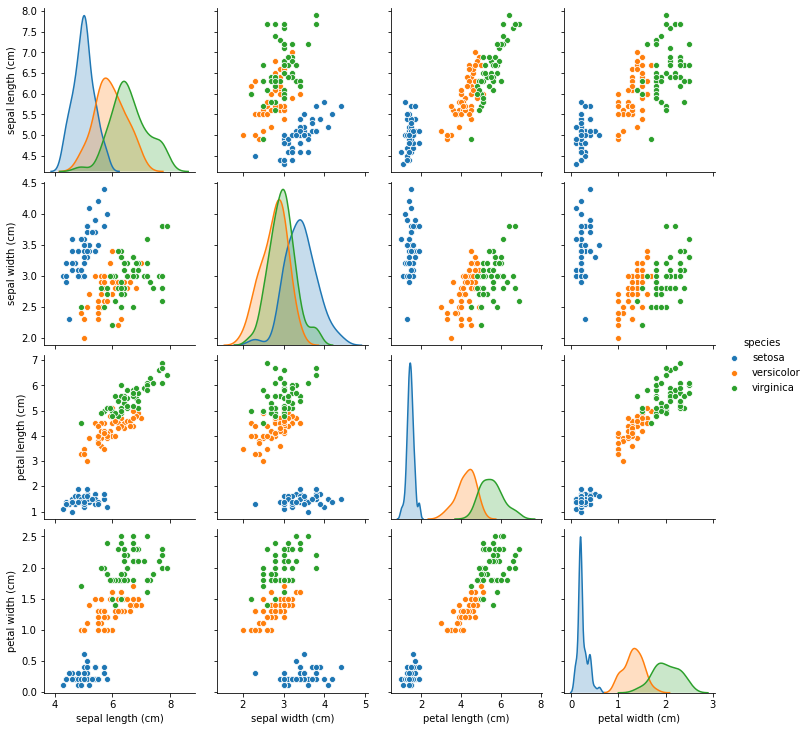

In [24]:
sns.pairplot(df,hue="species",vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [27]:
df=df.drop('species',axis='columns')

In [28]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# plotting correlation witth heat map

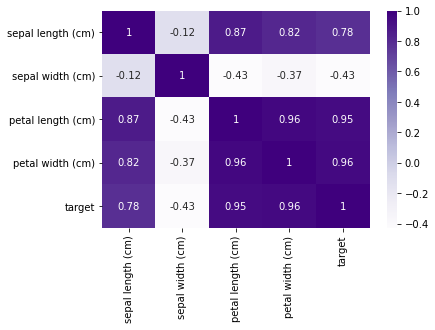

In [33]:
cor=df.corr()
sns.heatmap(cor,annot=True ,cmap="Purples")

# its observed that the petal length and petal width is highly correlated.

# preparing the model

In [36]:
X=df.drop("target",axis="columns")

In [38]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
y=df["target"]

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)

# model Buliding

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)


DecisionTreeClassifier()

In [48]:
dtree.score(X_test,y_test)

1.0

# Visualization of Decision Tree

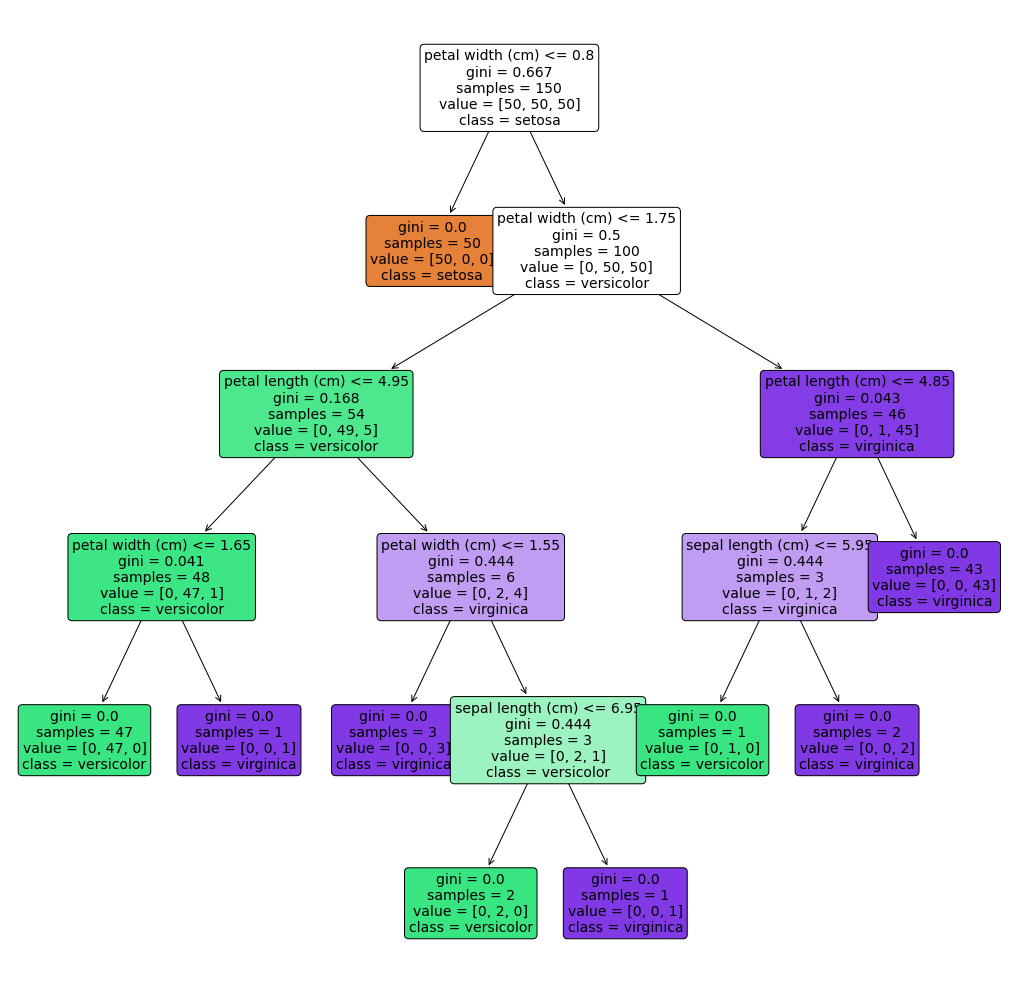

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,18))
plot=plot_tree(dtree,
              feature_names=data.feature_names,
              class_names=data.target_names,
              filled=True,
              rounded=True,
              fontsize=14)